# Logistic Regression

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
mean_01=np.array([0.1,0.2])
mean_02= np.array([5.1,5.2])

cov_01= np.array([[1.0,0.2],[0.2,1.1]])
cov_02= np.array([[1.0,0.3],[0.3,1.1]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,500) # We want to draw a distribution whose mean is this and covariance is this
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

In [6]:
print dist_01.shape
print dist_02.shape
#print dist_01
#2-weights or 1 bias


(500, 2)
(500, 2)


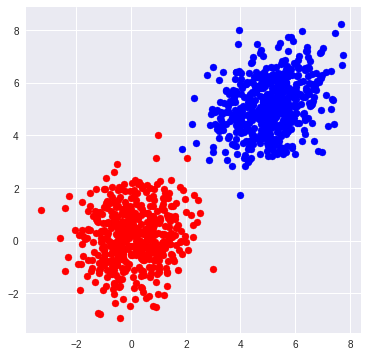

In [7]:
plt.figure(0, figsize=(6,6))
sns.plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
sns.plt.scatter(dist_02[:,0],dist_02[:,1],color='blue')

#sns.regplot(dist_01[:,0],dist_01[:,1],color='yellow')
#sns.regplot(dist_02[:,0],dist_02[:,1],color='green')
sns.plt.show()



In [8]:
#Total Datset
rows= dist_01.shape[0] +dist_02.shape[0]
cols= dist_01.shape[1]+1 #()

data= np.zeros((rows,cols)) #rows=1000,cols=3
print data.shape

data[:dist_01.shape[0], :dist_01.shape[1]] =dist_01      #(it means (500,2) me dist_01 dal dia)
data[dist_01.shape[0]:rows, :dist_01.shape[1]]=dist_02 ##(it means (500,2) me dist_02 dal dia)
data[dist_01.shape[0]:rows,-1] = 1.0                   #It means (500:1000 ke labels One kr diye)


(1000, 3)


In [9]:
np.random.shuffle(data) #it return none values and it is does because otherwise algorithm will accept that there is no chage and give 100 percent accuracy to calculate basically each random dataset

data[:10] #see data will shuffle


array([[ 4.78095328,  4.69438969,  1.        ],
       [-0.0157471 ,  1.62827514,  0.        ],
       [-0.61152729,  0.61333311,  0.        ],
       [-0.58061423,  0.7554398 ,  0.        ],
       [ 0.64540262, -2.10426987,  0.        ],
       [ 4.58363777,  5.76455841,  1.        ],
       [ 6.70823747,  5.95666033,  1.        ],
       [ 0.24378595, -0.05184205,  0.        ],
       [-1.4125761 , -0.74934069,  0.        ],
       [ 7.72244578,  6.68787051,  1.        ]])

# Splitting through sklearn function

In [42]:
'''


See fromkeshav code



'''

'\n\n\nSee fromkeshav code\n\n\n\n'

In [12]:
#Data splitting 
split= int(0.75*data.shape[0])
X_train= data[:split ,:-1]
Y_train= data[:split,-1]

X_test= data[split:,:-1] #xtest data for cross check whetehr it match or not
Y_test=data[split:,-1]  #labels test data

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape




(750, 2)
(250, 2)
(750,)
(250,)


In [31]:
def sigmoid(z):
    sig= 1.0/(1 + np.exp(-1*z)) #0.5 se upr h to class 1 nhi to class 0
    return sig                  #This return the value btw 0and 1
def hypothesis(x_sample,w,b): #b stands for bias(w0) and x_sample is one row in dataset X(750,2),w is 1d array containing(w1 and w2)
    h=(x_sample*w).sum() +b  #b is w0 h is y hat # h is basically (w0+w1x1+w2x2) rewritten as (b+(x_sample*w).sum())
    return sigmoid(h) #it will call sig(h(xi))

def get_error(x,w,y_true,b):#function to calculate error using log likleyhood function -(ylog(h(xi))+(1-y)log(1-h(xi))
                                                                                      #  ist case       IInd case
    err=0.0
    m=x.shape[0]
    #ek epoch (iteration) ke liye ye sara kamhoga phir ek error ki value return hogi phir 
    
    for ix in range(m):
        if y_true[ix]==0: #y is basically label for datset and it is true label 
            
            #print hypthesis(x[ix],w,b) #case ist 
            add_term= -1*(np.log(1- hypothesis(x[ix],w,b))) #if y_original=0 means -1*[(1-0)log(1-h(xi))] this is remianing error calculate this
            err+= add_term  #and see this if hypthesis is also 0 means no error y original is match with y predicted so by evaluationg the error should be zero
        
        else:
            add_term =-1*(np.log(hypothesis(x[ix],w,b)))  #second case if y_original=1 means -1*[(1)log(h(xi))] this is remaining
            err+=add_term #And in this also if Y_predicted means hypothesis 1 then error should be zero by evaluating log(1) is zero means error zero hence proved
        
    
    err=err/m  #Atlast divide error by m
    return err
            
            
    #print err
        

In [32]:
#get_error(X_train[3:4],W,Y_train[3:4],b)

import sys
np.log(0)


In [33]:
def get_gradients(x,w,y_true,b):# x is full x_train and w is (1d array) , y_true is original label and b is bias
    
    #this grad_w and grad_b are the derivatives of log loss function in general -1(yj-h(x(i)))xj 
    grad_w= np.zeros(w.shape[0]) #w is a shape(2-features) one is for label and other is for cordinates bascially grad_w is w1 and w2 its a 1-d arrayn of w0  
    grad_b= 0 # derivative of log loss function wrt w0 is 0
    
    m=x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix],w,b)-y_true[ix])*(x[ix]) # Calculate grad for all points in datset
        grad_b += (hypothesis(x[ix],w,b)-y_true[ix])*(1)  # calculate grad for bias wo for all points
        
    
    return [grad_w,grad_b] #return the values of differntial of loss function wrt(w0,w1,w2)
    
        

In [34]:
def optimizer(x,w,y_true,b,learning_rate=0.001): #this function is for calculationg the gradient to reach at local minima where error is minimum
    error= get_error(x,w,y_true,b) #calculatng error here
    #note refer to block where we call Logistic_Regression
    
    [grad_w,grad_b] = get_gradients(x,w,y_true,b) #this will make a list of all differntial gradient wtr(w0,w1,w2)
    
    b=b -learning_rate*grad_b   #for bias updating the value of b
    w= w - learning_rate*grad_w #update the values of w1,w2 both
    
    return error ,w,b
    
    

In [35]:
def Logistic_Regression(X_train,Y_train, nb_epochs=2,learning_rate=0.0001): #nb_epochs is no of iteration in one iteration it will recompute the values of W and tend to minimize the error
    
    loss=[]
    ##Paramater Initialization
    W=np.array([0.3,0.2]) #default values
    b= -1.4
    
    for ix in range(nb_epochs): #nb_epochs is no of iterations on X dataset (1000) kitni bari weights update ho rha h
        error,W,b=optimizer(X_train,W,Y_train,b,learning_rate)
        loss.append(error)
        
    
    W_final= W #final postion 
    b_final=b #final bias
    
    
    return loss, W_final,b_final

    

In [36]:
loss,W,b=Logistic_Regression(X_train, Y_train,nb_epochs=150,learning_rate=0.0001)
print len(loss) #Note loss ki len no of epochs ke equal isliye aa rhi h basically see in optimizer function for ist iteration it call error function 
#and the error function calculate the error with all dataset X and return the value of error and then immediatey call get_gradients that will update the valuw of w that means
#update the postion of line or sheet hence error will minimide for now second iteration calculate error this will slightly more decrease and hence the graph of error is decreasing function curve

150


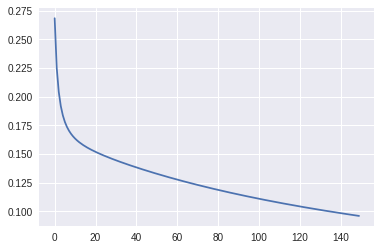

In [27]:
#print loss
sns.plt.plot(loss)

# Now Accuracy part(2-methods)

In [28]:
print X_test[3],Y_test[3],hypothesis(X_test[3],W,b) #X_test ki 3 row ka point (x,y) ka original label 1 hai and hypothesis will return a predicted_val is 098 means >0.5 hence class 1

[6.82308604 3.4034141 ] 1.0 0.9867933348364073


In [29]:
predicted_val=[]
for ix in range(len(X_test)):
    k=hypothesis(X_test[ix],W,b)
    if k>0.5: #if k >0.5 hence class 1 otherwise class 0
        k=1
    else:
        k=0
    
    predicted_val.append(k)

#print predicted_val



In [30]:
print predicted_val #list of hypothesis values(predicted_val)
print Y_test #actual labels
from sklearn.metrics import accuracy_score #this sklearn function only valid for classification methods in liniear regresssion it cant be applied
print accuracy_score(predicted_val,Y_test)

[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.

# 2 method

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr =LogisticRegression()

In [39]:
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

1.0